Mean Squared Error: 0.01
R-squared: 1.00


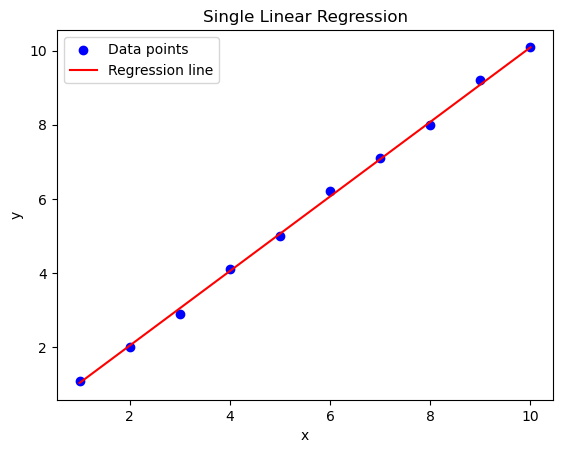

In [11]:
#Single Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1.1, 2.0, 2.9, 4.1, 5.0, 6.2, 7.1, 8.0, 9.2, 10.1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single Linear Regression')
plt.legend()
plt.show()


Mean Squared Error: 1.72
R-squared: 0.99
Coefficients: [1.96307012 0.68754255 1.96307012]
Intercept: -5.141592920353993


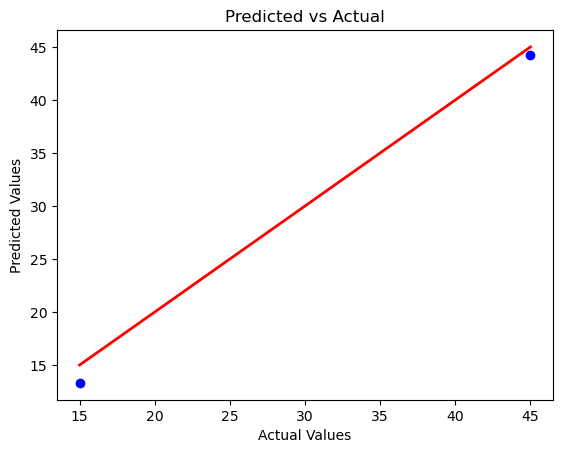

In [13]:
#Multiple Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 1, 3, 5, 7, 8, 6, 9, 11],
    'Feature3': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Target': [10, 15, 14, 20, 25, 30, 35, 40, 45, 50]
}

df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2', 'Feature3']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()


Iteration 0, Cost: 22.0000
Iteration 100, Cost: 0.0172
Iteration 200, Cost: 0.0122
Iteration 300, Cost: 0.0087
Iteration 400, Cost: 0.0062
Iteration 500, Cost: 0.0044
Iteration 600, Cost: 0.0032
Iteration 700, Cost: 0.0023
Iteration 800, Cost: 0.0016
Iteration 900, Cost: 0.0011
Final parameters: [0.09475322 1.97375488]


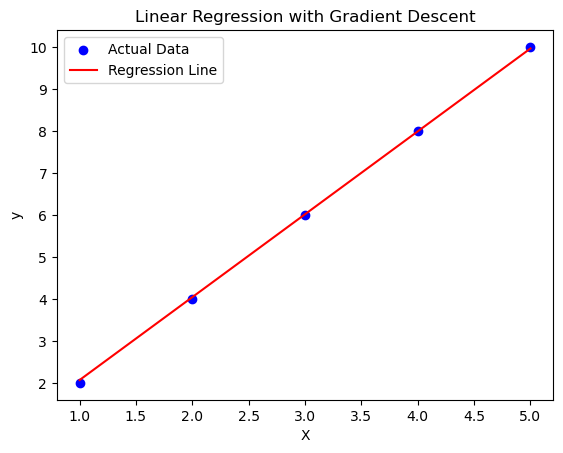

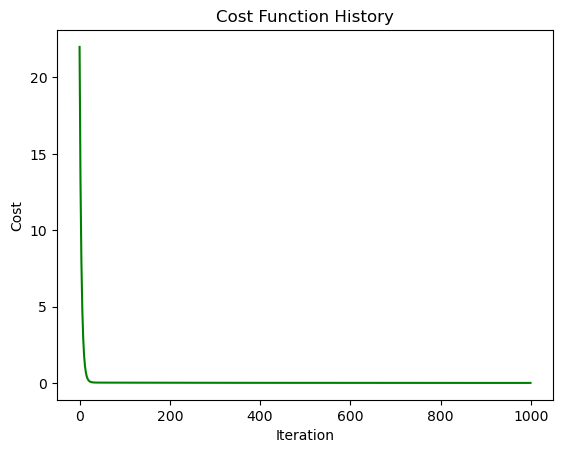

In [15]:
#Gradient Decent
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5]) 
y = np.array([2, 4, 6, 8, 10])  

X = X.reshape(-1, 1)
X = np.c_[np.ones(X.shape[0]), X]  

theta = np.zeros(X.shape[1]) 
learning_rate = 0.01
num_iterations = 1000

m = len(y) 
cost_history = []

for i in range(num_iterations):
    predictions = X.dot(theta)
    
    error = predictions - y
    gradient = (1/m) * X.T.dot(error)
    theta -= learning_rate * gradient
    
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")

print(f"Final parameters: {theta}")

y_pred = X.dot(theta)

plt.scatter(X[:, 1], y, color='blue', label='Actual Data')
plt.plot(X[:, 1], y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()



Intercept (beta_0): 0.2432432432432435
Slope (beta_1): 1.4864864864864864


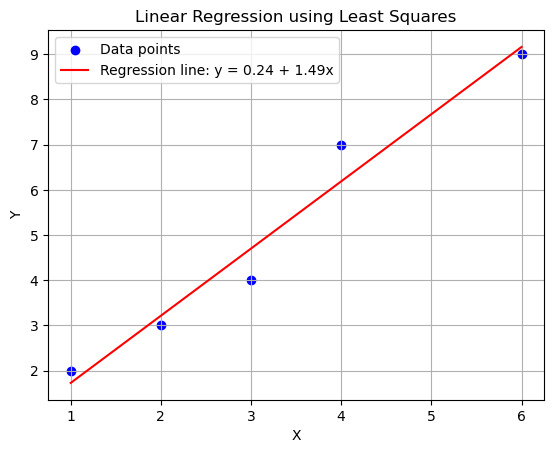

Prediction for x = 6: y = 9.162162162162163


In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 6])
y = np.array([2, 3, 4, 7, 9])

n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_x_y = np.sum(x * y)

beta_1 = (n * sum_x_y - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
beta_0 = (sum_y - beta_1 * sum_x) / n

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

y_pred = beta_0 + beta_1 * x

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Regression line: y = {beta_0:.2f} + {beta_1:.2f}x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using Least Squares')
plt.legend()
plt.grid(True)
plt.show()

x_new = 6
y_new = beta_0 + beta_1 * x_new
print(f"Prediction for x = {x_new}: y = {y_new}")

Intercept (a0): -10.0
Slope for x1 (a1): 2.5
Slope for x2 (a2): 1.6666666666666667


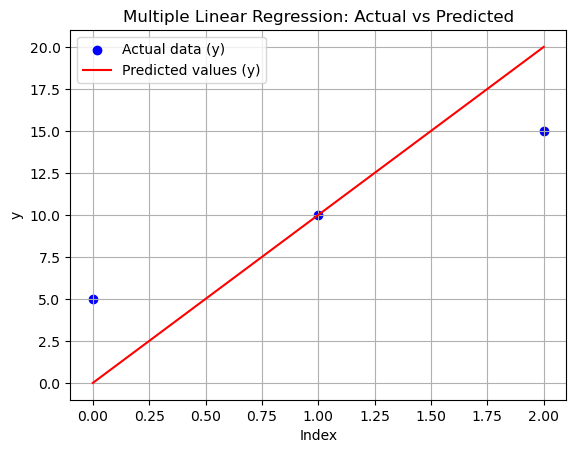

Prediction for x1 = 7, x2 = 10: y = 24.166666666666668


In [27]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array([2, 4, 6])
x2 = np.array([3, 6, 9])
y = np.array([5, 10, 15])
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)
y_bar = np.mean(y)

numerator_a1 = np.sum((x1 - x1_bar) * (y - y_bar))
denominator_a1 = np.sum((x1 - x1_bar) ** 2) 
a1 = numerator_a1 / denominator_a1
numerator_a2 = np.sum((x2 - x2_bar) * (y - y_bar))
denominator_a2 = np.sum((x2 - x2_bar) ** 2) 
a2 = numerator_a2 / denominator_a2

a0 = y_bar - a1 * x1_bar - a2 * x2_bar

print(f"Intercept (a0): {a0}")
print(f"Slope for x1 (a1): {a1}")
print(f"Slope for x2 (a2): {a2}")
y_pred = a0 + a1 * x1 + a2 * x2

plt.scatter(range(len(y)), y, color='blue', label='Actual data (y)')
plt.plot(range(len(y)), y_pred, color='red', label=f'Predicted values (y)')
plt.xlabel('Index')
plt.ylabel('y')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

x1_new = 7
x2_new = 10
y_new = a0 + a1 * x1_new + a2 * x2_new
print(f"Prediction for x1 = {x1_new}, x2 = {x2_new}: y = {y_new}")

Final slope (m): 95.0191002624001
Final intercept (b): 21.546152652800018


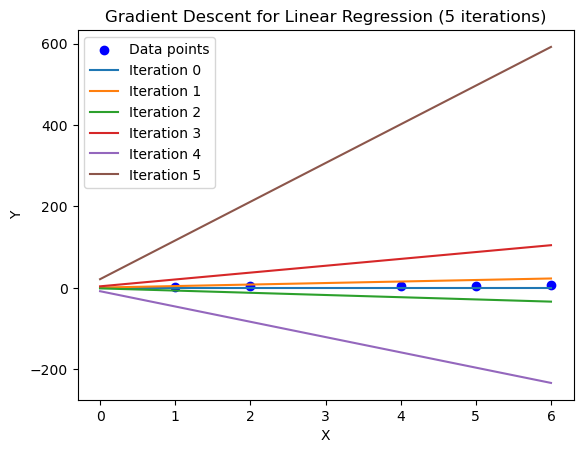

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x_vals = np.array([1, 2, 4, 5 ,6])
y_vals = np.array([3, 4, 5, 4, 7])

m = 0 
b = 0  

alpha = 0.1

iterations = 5
history_m = [m] 
history_b = [b]  

for i in range(iterations):
    y_pred = m * x_vals + b
    
    dm = (-2 / len(x_vals)) * np.sum(x_vals * (y_vals - y_pred)) 
    db = (-2 / len(x_vals)) * np.sum(y_vals - y_pred) 
    
    m -= alpha * dm
    b -= alpha * db
    
    history_m.append(m)
    history_b.append(b)

print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")

plt.scatter(x_vals, y_vals, color='blue', label='Data points')

x_line = np.linspace(0, 6, 100)
for i in range(len(history_m)):
    plt.plot(x_line, history_m[i] * x_line + history_b[i], label=f"Iteration {i}")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gradient Descent for Linear Regression (5 iterations)')
plt.show()